In [41]:
import numpy as np
import pandas as pd

In [42]:
#col_names = ["DestinationPort","FlowDuration","TotalFwdPackets","TotalBackwardPackets","TotalLengthofFwdPackets","TotalLengthofBwdPackets","FwdPacketLengthMax","FwdPacketLengthMin","FwdPacketLengthMean","FwdPacketLengthStd","BwdPacketLengthMax","BwdPacketLengthMin","BwdPacketLengthMean","BwdPacketLengthStd","FlowBytes/s","FlowPackets/s","FlowIATMean","FlowIATStd","FlowIATMax","FlowIATMin","FwdIATTotal","FwdIATMean","FwdIATStd","FwdIATMax","FwdIATMin","BwdIATTotal","BwdIATMean","BwdIATStd","BwdIATMax","BwdIATMin","FwdPSHFlags","BwdPSHFlags","FwdURGFlags","BwdURGFlags","FwdHeaderLength","BwdHeaderLength","FwdPackets/s","BwdPackets/s","MinPacketLength","MaxPacketLength","PacketLengthMean","PacketLengthStd","PacketLengthVariance","FINFlagCount","SYNFlagCount","RSTFlagCount","PSHFlagCount","ACKFlagCount","URGFlagCount","CWEFlagCount","ECEFlagCount","Down/UpRatio","AveragePacketSize","AvgFwdSegmentSize","AvgBwdSegmentSize","FwdHeaderLength","FwdAvgBytes/Bulk","FwdAvgPackets/Bulk","FwdAvgBulkRate","BwdAvgBytes/Bulk","BwdAvgPackets/Bulk","BwdAvgBulkRate","SubflowFwdPackets","SubflowFwdBytes","SubflowBwdPackets","SubflowBwdBytes","Init_Win_bytes_forward","Init_Win_bytes_backward","act_data_pkt_fwd","min_seg_size_forward","ActiveMean","ActiveStd","ActiveMax","ActiveMin","IdleMean","IdleStd","IdleMax","IdleMin","Label"]
data = pd.read_csv('02-28-2018.csv', sep=",")#names=col_names)
data.head(3)

C:\Users\thobani_radebe\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,28/02/2018 08:22:13,94658,6,7,708,3718,387,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1,443,6,28/02/2018 08:22:13,206,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
2,445,6,28/02/2018 08:22:15,165505,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign


In [43]:
print(data['Label'].value_counts(sort=1))

Benign           544200
Infilteration     68871
Label                33
Name: Label, dtype: int64


In [44]:
data.Label[data.Label == 'Benign'] = 1
data.Label[data.Label == 'Infilteration'] = 0
data['Label'].value_counts()

1        544200
0         68871
Label        33
Name: Label, dtype: int64

In [45]:
#data = data.apply(pd.to_numeric)
#data.iloc[21838]  
lis = []
lis = data[data['Dst Port']=='Dst Port'].index.values
print(lis)

[ 21838  43117  63291  84013 107719 132409 154205 160206 202680 228583
 247717 271676 296994 322938 344162 349509 355079 360660 366039 367413
 368613 371159 377704 399543 420822 440996 461718 485424 510114 534073
 559391 585335 606559]


In [46]:
for i in lis:
    #print(data.loc[i, "Dst Port"], data.loc[i, "Protocol"])
    #if type(data.loc[i, "Dst Port"]) != int or type(data.loc[i, "Dst Port"]) != float:
    data=data.drop(i)

In [53]:
data.shape
data = data.apply(pd.to_numeric)

In [55]:
def clean_dataset(data):
  assert isinstance (data, pd.DataFrame)
  data.dropna(inplace=True)
  indices_to_keep=~data.isin([np.nan, np.inf, -np.inf]).any(1)
  return data[indices_to_keep].astype(np.double)
#data = data.drop(labels=['Timestamp'], axis=1)
data = clean_dataset(data)

In [56]:
print(data.select_dtypes(exclude='number').columns)

Index([], dtype='object')


In [57]:
#Y = data.iloc[:,78]
Y = data['Label']
print(Y)
#X = data.drop(data.columns[78],axis=1)
X = data.drop(labels=['Label'], axis=1)

#print(X)
print(X.shape)
print(Y.shape)

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
613099    0.0
613100    0.0
613101    1.0
613102    0.0
613103    0.0
Name: Label, Length: 606902, dtype: float64
(606902, 78)
(606902,)


In [58]:
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size= 0.3,random_state=20)
len(ytest)
K = math.sqrt(len(ytest))
K
if(K > 500):
    K = 99
if(int(K)%2 == 0):
    K = K-1

print(K,"The int version is", int(K))    

425.6977853235238 The int version is 425


In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=int(K))
knn_model.fit(xtrain,ytrain)
knn_model.score(xtest,ytest)

0.8869287256070434

C:\Users\thobani_radebe\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\thobani_radebe\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\thobani_radebe\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     20587
         1.0       0.89      1.00      0.94    161484

    accuracy                           0.89    182071
   macro avg       0.44      0.50      0.47    182071
weighted avg       0.79      0.89      0.83    182071



[[     0  20587]
 [     0 161484]]




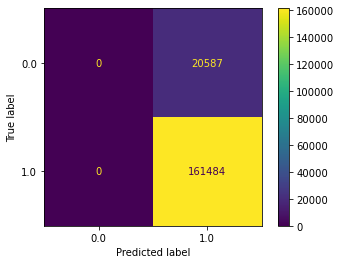

In [60]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
Pred = knn_model.predict(xtest)
print(classification_report(ytest,Pred))
plot_confusion_matrix(knn_model,xtest,ytest)
print("\n")
print(confusion_matrix(ytest,Pred))
print("\n")

C:\Users\thobani_radebe\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\thobani_radebe\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\thobani_radebe\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


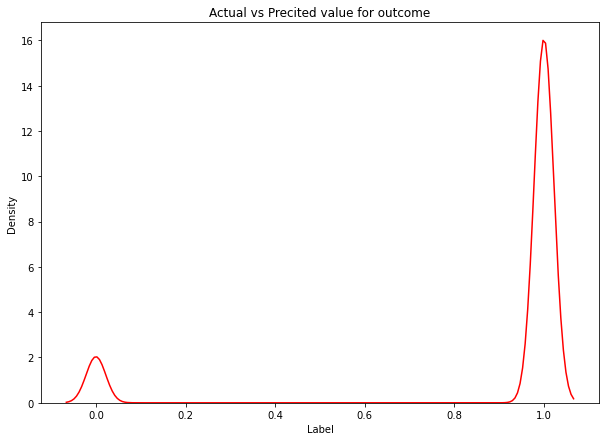

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
ax = sns.distplot(data.iloc[:,78], hist=False, color="r", label="Actual Value")
sns.distplot(Pred, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()